# Introduction

In this notebook, I've used **CNN** to perform Image Classification on the Brain Tumor dataset.<br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from tqdm import tqdm
import pickle
import random
from sklearn.utils import shuffle
import pathlib as pl


---

# Importing Data

In [3]:
def select_class(path):
    if(path == '/content/drive/MyDrive/TechTriathlon Datathon/Dataset/category1_tumor'):
        return 0
    elif(path == '/content/drive/MyDrive/TechTriathlon Datathon/Dataset/category2_tumor'):
        return 1
    elif(path == '/content/drive/MyDrive/TechTriathlon Datathon/Dataset/category3_tumor'):
        return 2
    else:
        return 3

In [4]:
# function to create the data set
def create_dataset(path):
    x,y = [],[]
    for subdir in pl.Path(path).iterdir():
        print(subdir)
        if subdir.is_dir():
            data_dir = pl.Path(subdir)
            file_list = list(data_dir.glob('*.jpg'))

            for file in file_list:
                file_path = data_dir.joinpath(file.name)
                img = cv2.imread(str(file_path))
                resized_img = cv2.resize(img,(150,150))
                x.append(resized_img)
                y.append(select_class(str(subdir)))
    return x,y

In [5]:
x,y = create_dataset('/content/drive/MyDrive/TechTriathlon Datathon/Dataset')

/content/drive/MyDrive/TechTriathlon Datathon/Dataset/category1_tumor
/content/drive/MyDrive/TechTriathlon Datathon/Dataset/category2_tumor
/content/drive/MyDrive/TechTriathlon Datathon/Dataset/no_tumor
/content/drive/MyDrive/TechTriathlon Datathon/Dataset/category3_tumor


In [6]:
print("Shape of x:", np.array(x).shape)
print("Shape of y:", np.array(y).shape)

Shape of x: (3224, 150, 150, 3)
Shape of y: (3224,)


# Data Analysis

In [7]:
# Find unique elements and their counts
unique_values, counts = np.unique(y, return_counts=True)
print(unique_values)
# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

[0 1 2 3]
Value: 0, Count: 916
Value: 1, Count: 927
Value: 2, Count: 891
Value: 3, Count: 490


# Data Visualization

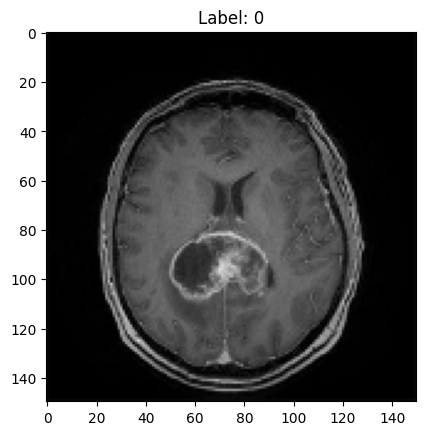

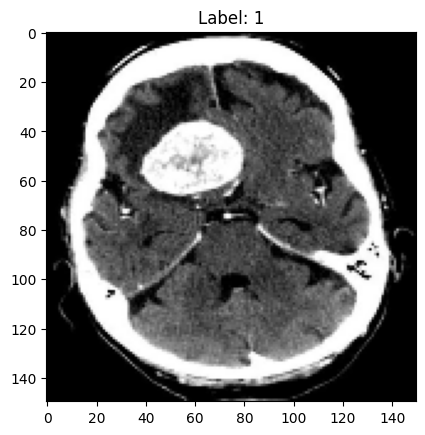

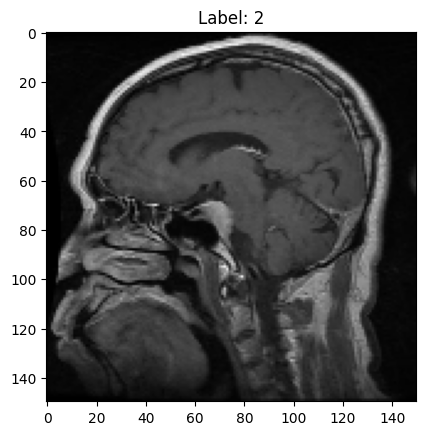

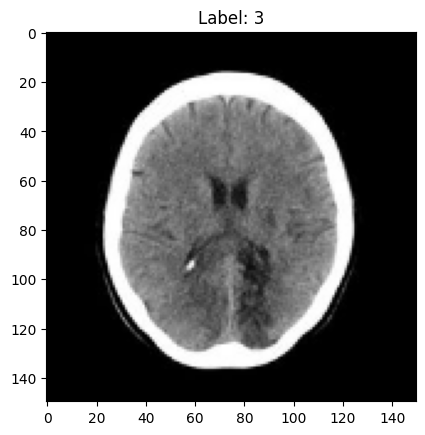

In [8]:
for i in range(4): # Display first 4 images
    index = y.index(i)
    plt.imshow(cv2.cvtColor(x[index], cv2.COLOR_BGR2RGB))
    plt.title(f"Label: {y[index]}")
    plt.show()

In [9]:
X = np.array(x)
Y = np.array(y)

In [10]:
labels = ["category1_tumor","category2_tumor","category3_tumor","no_tumor"]

# Color

In [11]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

---

# Data Preperation

In [12]:
# Shuffling the data set
X,Y = shuffle(X,Y)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1 ,random_state = 100)

# Data Visualization

Training Counts
{'category1_tumor': 823, 'category2_tumor': 836, 'category3_tumor': 801, 'no_tumor': 441}

Testing Counts
{'category1_tumor': 93, 'category2_tumor': 91, 'category3_tumor': 90, 'no_tumor': 49}


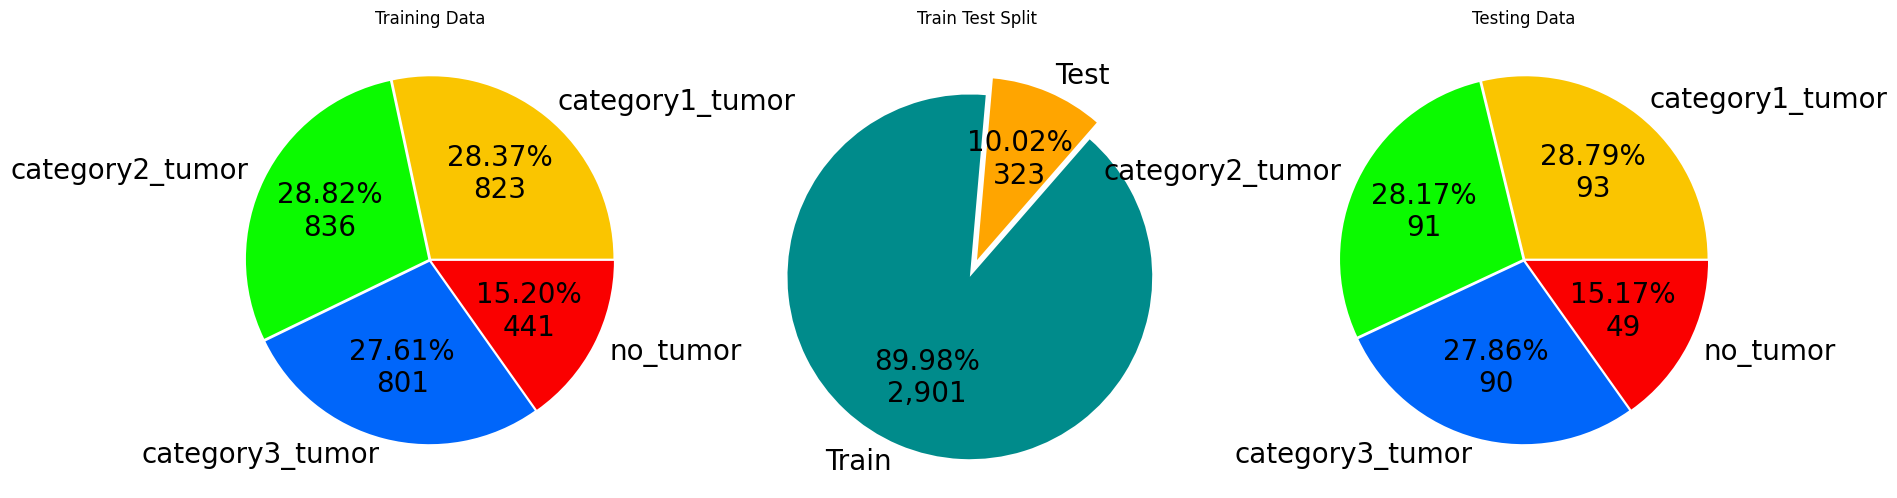

In [17]:
_, ax = plt.subplots(ncols=3, figsize=(20, 14))
classes = [0,1,2,3]
N_TYPES = 4

# Plotting training data types
class_counts = [len([x for x in y_train if x == label]) for label in classes]
print('Training Counts')
print(dict(zip(labels, class_counts)))

ax[0].set_title('Training Data')
ax[0].pie(
    class_counts,
    labels=[labels[id] for id in classes],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),
    textprops={'fontsize': 20}
)

# Plotting distribution of train test split
ax[1].set_title('Train Test Split')
ax[1].pie(
    [len(y_train), len(y_test)],
    labels=['Train','Test'],
    colors=['darkcyan', 'orange'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum([len(y_train), len(y_test)]) / 100),
    explode=(0.1, 0),
    startangle=85,
    textprops={'fontsize': 20}
)

# Plotting testing data types
class_counts = [len([x for x in y_test if x == label]) for label in classes]
print('\nTesting Counts')
print(dict(zip(labels, class_counts)))

ax[2].set_title('Testing Data')
ax[2].pie(
    class_counts,
    labels=[labels[id] for id in classes],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),  # Explode the slices slightly for better visualization
    textprops={'fontsize': 20}  # Set the font size for the text on the pie chart
)


plt.show()

# Data Augmentation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

In [ ]:
import matplotlib.pyplot as plt
# Define the preprocessing steps
preprocessing_steps = [
    "Resizing",
    "Data Augmentation (Rotation, Shift, Shear, Zoom, Flip)",
    "Normalization"
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the preprocessing steps as a sequence
ax.plot(preprocessing_steps, marker='o', linestyle='-', color='b')

# Annotate the steps with numbers
for i, step in enumerate(preprocessing_steps):
    ax.text(i, 0.5, f"{i + 1}", color='black', fontsize=12, ha='center', va='center')

# Set labels and title
ax.set_xlabel('Preprocessing Steps', fontsize=14)
ax.set_ylabel('Processing Sequence', fontsize=14)
ax.set_title('Preprocessing Architecture', fontsize=16)

# Remove x-axis ticks
ax.set_xticks([])

# Display the plot
plt.show()

# Data Encoding

Performing **One Hot Encoding** on the labels after converting it into numerical values:

In [19]:
y_train = tf.keras.utils.to_categorical(y_train)

y_test = tf.keras.utils.to_categorical(y_test)

---

 # CNN Learning

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

# Define your image size
IMG_SIZE = 150  # Adjust this according to your dataset

# Create a Sequential model
model = Sequential()

**Callbacks** -> Callbacks can help you fix bugs more quickly, and can help you build better models. They can help you visualize how your model’s training is going, and can even help prevent overfitting by implementing early stopping or customizing the learning rate on each iteration.<br><br>
By definition, "A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training."

In this notebook, I'll be using **TensorBoard, ModelCheckpoint and ReduceLROnPlateau** callback functions

---

In [21]:
import datetime
# Callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(patience=20, restore_best_weights=True)

callbacks = [tensorboard, checkpoint, reduce_lr, early_stopping]

**GlobalAveragePooling2D** -> This layer acts similar to the Max Pooling layer in CNNs, the only difference being is that it uses the Average values instead of the Max value while *pooling*. This really helps in decreasing the computational load on the machine while training.
<br><br>
**Dropout** -> This layer omits some of the neurons at each step from the layer making the neurons more independent from the neibouring neurons. It helps in avoiding overfitting. Neurons to be ommitted are selected at random. The **rate** parameter is the liklihood of a neuron activation being set to 0, thus dropping out the neuron

**Dense** -> This is the output layer which classifies the image into 1 of the 4 possible classes. It uses the **softmax** function which is a generalization of the sigmoid function.

In [22]:
# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Adding two more convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add global average pooling and dropout
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add the output layer
num_classes = 4  # Change this to the number of classes in your problem
model.add(Dense(num_classes, activation='softmax'))

In [23]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

# Training The Model

In [25]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, verbose=1, batch_size=32,
                    callbacks=callbacks)

Epoch 1/50
82/82 [==============================] - 15s 23ms/step - loss: 2.0313 - accuracy: 0.3793 - val_loss: 1.2120 - val_accuracy: 0.4364 - lr: 0.0010
Epoch 2/50
82/82 [==============================] - 1s 15ms/step - loss: 1.1547 - accuracy: 0.4870 - val_loss: 0.9967 - val_accuracy: 0.6048 - lr: 0.0010
Epoch 3/50
82/82 [==============================] - 1s 14ms/step - loss: 0.9408 - accuracy: 0.6180 - val_loss: 0.9073 - val_accuracy: 0.5842 - lr: 0.0010
Epoch 4/50
82/82 [==============================] - 1s 14ms/step - loss: 0.7427 - accuracy: 0.6943 - val_loss: 0.7321 - val_accuracy: 0.6804 - lr: 0.0010
Epoch 5/50
82/82 [==============================] - 1s 15ms/step - loss: 0.6233 - accuracy: 0.7441 - val_loss: 0.6291 - val_accuracy: 0.7595 - lr: 0.0010
Epoch 6/50
82/82 [==============================] - 1s 14ms/step - loss: 0.5331 - accuracy: 0.7874 - val_loss: 0.5767 - val_accuracy: 0.7732 - lr: 0.0010
Epoch 7/50
82/82 [==============================] - 1s 14ms/step - loss: 0.

# Model Evaluation

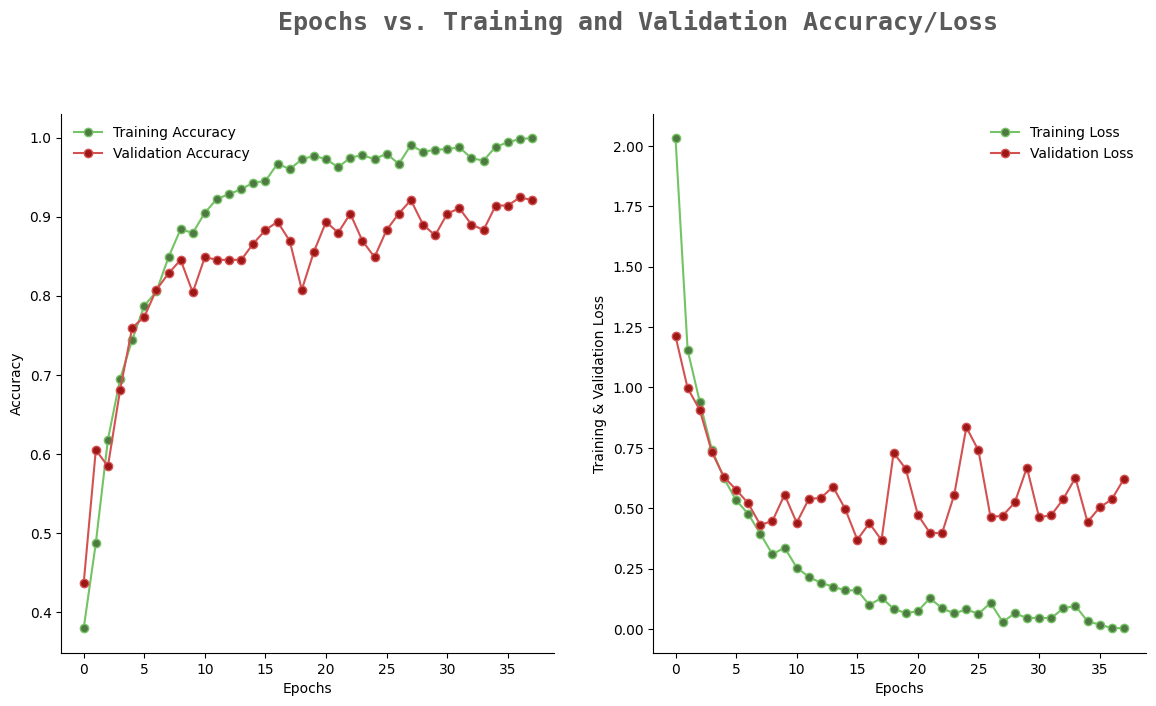

In [26]:
filterwarnings('ignore')
epochs =  history.epoch
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [27]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 10.4 MB/s eta 0:00:00


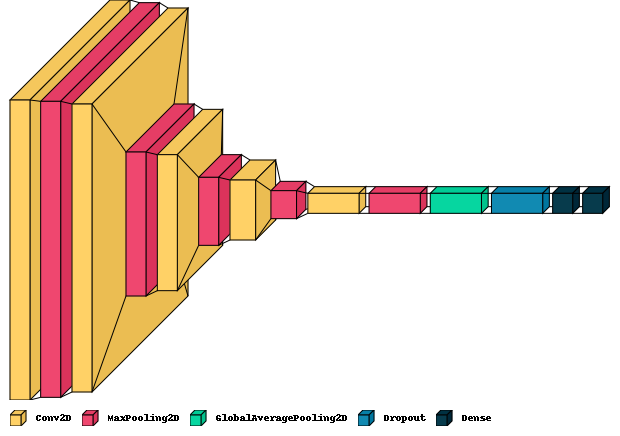

In [28]:
from visualkeras import layered_view

# Visualize the model
layered_view(model, legend=True, max_xy=300)

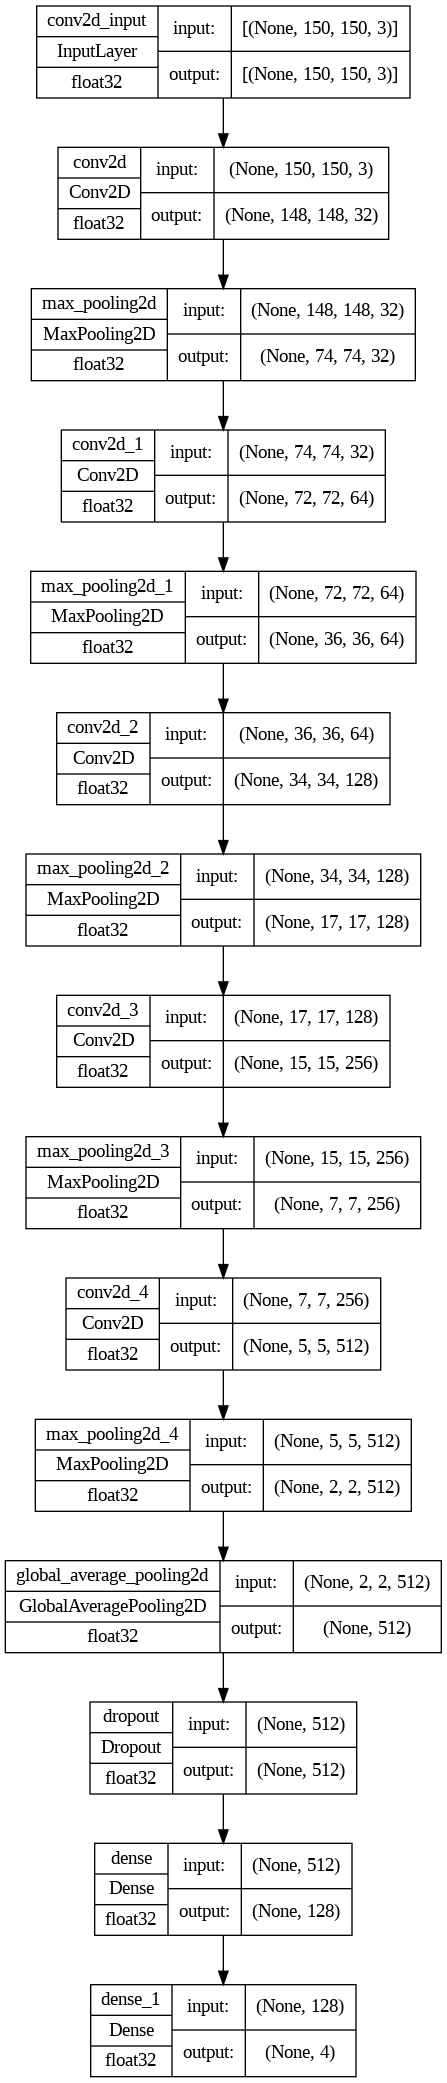

In [29]:
from tensorflow.keras.models import Model
from keras.utils import plot_model
model_visual = Model(inputs=model.input, outputs=model.output)

# Save model architecture to a file
plot_model(model_visual, show_dtype=True, to_file='model_architecture.png', show_shapes=True)

# Display model architecture in the notebook

from IPython.display import Image
Image(retina=True, filename='model_architecture.png')

---

# Prediction

I've used the *argmax function* as each row from the prediction array contains four values for the respective labels. The **maximum** value which is in each row depicts the predicted output out of the 4 possible outcomes.<br>
So with *argmax*, I'm able to find out the index associated with the predicted outcome.

In [30]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 0s 3ms/step


---

# Evaluation

In [31]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        93
           1       0.85      0.88      0.86        91
           2       0.97      0.99      0.98        90
           3       0.83      0.92      0.87        49

    accuracy                           0.91       323
   macro avg       0.90      0.91      0.90       323
weighted avg       0.91      0.91      0.91       323



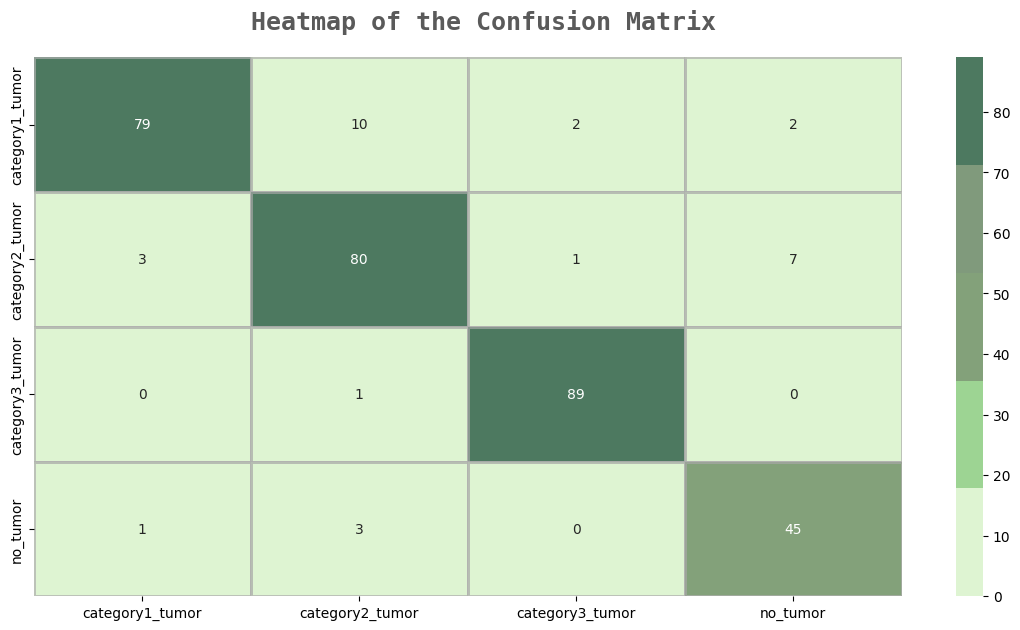

In [32]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

# Saving The Model

In [35]:
model.save("datathon_bytestormsquad_.h5")

In [36]:
from google.colab import files
files.download("datathon_bytestormsquad_.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>